# Работа  с выбросами

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
df = pd.read_csv('train.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [10]:
df.shape

(10000, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [168]:
df = df.drop(['Id', 'Healthcare_1'], axis=1)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962


In [169]:
df['LifeSquare'] = df['Square'] - df['KitchenSquare'] - 6
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0,0,B,305018.871089
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1,0,B,177734.553407
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,3,1,B,282078.720850
3,1,1.0,40.409907,33.409907,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0,1,B,168106.007630
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0,6,B,343995.102962


Переведем категориальные в числовые

In [170]:
col = df.select_dtypes(include='object').columns.tolist()
col

['Ecology_2', 'Ecology_3', 'Shops_2']

In [171]:
df[col[0]].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [172]:
df[col[1]].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [173]:
df[col[2]].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,col] = df.loc[:,col].apply(le.fit_transform)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,1,1.0,40.409907,33.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int32  
 10  Ecology_3      10000 non-null  int32  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  int32  
 17  Price          10000 non-null  float64
dtypes: floa

##### Обнаружение и обработка выбросов

 **Price**

##### первый способ

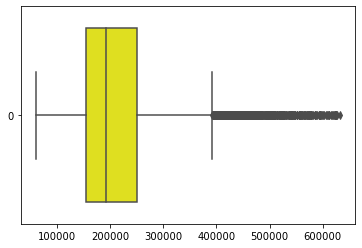

In [23]:
sns.boxplot(data=df['Price'], color='yellow', orient='h');

In [176]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0], x[(x <= upper_bound) & (x >= lower_bound)].min(), x[(x <= upper_bound) & (x >= lower_bound)].min()

In [177]:
price_ooutliers_index, min_border, max_border = outliers_iqr(df['Price'])

In [178]:
min_border, max_border

(59174.77802758122, 59174.77802758122)

In [179]:
len(price_ooutliers_index)

583

Выбросы заменим на nan

In [180]:
df.loc[price_ooutliers_index, 'Price'] = np.nan

In [181]:
#df = df.dropna()

##### второй способ

In [47]:
def outliers_z_score(x, threshold=3):
    mean = np.mean(x)
    std = np.std(x)
    z_scores = [(element - mean) / std for element in x]
    return np.where(np.abs(z_scores) > threshold)[0]

In [48]:
price_ooutliers_index = outliers_z_score(df['Price'])
len(price_ooutliers_index)

175

In [49]:
#df.loc[price_ooutliers_index, 'Price'] = np.nan

In [50]:
#df = df.dropna()

##### третий способ

In [51]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

In [73]:
mu, sigma = estimate_gaussian(df['Price'])
distribution = get_gaussian(mu, sigma)
probabilities = get_probs(distribution, df['Price'])
probabilities

array([4.62527672e-11, 4.62527672e-11, 4.62527672e-11, ...,
       4.62527672e-11, 4.62527672e-11, 4.62527672e-11])

In [74]:
price_ooutliers_index = np.where(probabilities < 4.62527672e-11)[0]

In [75]:
len(price_ooutliers_index)

61

In [81]:
df.shape

(9417, 18)

**Rooms**

In [182]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [183]:
room_outliers_index = df.loc[(df['Rooms']==0)|(df['Rooms']>=6), 'Rooms'].index
room_outliers_index

Int64Index([2004, 2194, 2728, 3780, 5894, 6088, 6401, 7644, 7929, 8794, 9767,
            9869],
           dtype='int64')

In [184]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 1
df.loc[df['Rooms'] >= 6, 'Rooms'] = df['Rooms'].median()

Создадим столбец Rooms_outlier, запоминающий места где были выбросы

In [185]:
df['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [186]:
df['Rooms_outlier'] = 0
df.loc[room_outliers_index, 'Rooms_outlier'] = 1

In [187]:
df['Rooms_outlier'].value_counts()

0    9988
1      12
Name: Rooms_outlier, dtype: int64

##### Kitchen Square

In [188]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [189]:
kit_outliers_index = df.loc[(df['KitchenSquare']<3)|(df['KitchenSquare']>13), 'Rooms'].index
kit_outliers_index

Int64Index([   3,    8,    9,   18,   19,   20,   24,   25,   26,   30,
            ...
            9969, 9975, 9978, 9979, 9981, 9982, 9983, 9990, 9991, 9993],
           dtype='int64', length=3350)

In [190]:
df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
df.loc[df['KitchenSquare'] >= 13, 'KitchenSquare'] = df['KitchenSquare'].median()

In [191]:
df['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1294
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
4.0       39
Name: KitchenSquare, dtype: int64

In [192]:
df['Kitchen_outlier'] = 0
df.loc[kit_outliers_index, 'Kitchen_outlier'] = 1

In [193]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Kitchen_outlier
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,0,0
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,0,0
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,0,0
3,1,1.0,40.409907,33.409907,3.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,0,1
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,0,0


##### House Floor

In [194]:
df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [195]:
housefloor_outliers_index = df.loc[df['HouseFloor']==0, 'HouseFloor'].index
housefloor_outliers_index

Int64Index([  24,  152,  159,  186,  229,  233,  256,  260,  303,  306,
            ...
            9762, 9766, 9820, 9824, 9869, 9889, 9931, 9940, 9950, 9996],
           dtype='int64', length=269)

In [196]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [197]:
df['HouseFloor_outlier'] = 0
df.loc[housefloor_outliers_index, 'HouseFloor_outlier'] = 1

In [198]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Kitchen_outlier,HouseFloor_outlier
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,...,11,3097,0,0,0,1,305018.871089,0,0,0
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,...,30,6207,1,1,0,1,177734.553407,0,0,0
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,...,33,5261,0,3,1,1,282078.720850,0,0,0
3,1,1.0,40.409907,33.409907,3.0,10,22.0,1977,0.007122,1,...,1,264,0,0,1,1,168106.007630,0,1,0
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,...,33,8667,2,0,6,1,343995.102962,0,0,0


**Floor**

In [199]:
(df['Floor'] > df['HouseFloor']).sum()

1610

In [200]:
floor_outliers_index = df.loc[df['Floor'] > df['HouseFloor'], 'Floor'].index
floor_outliers_index

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [201]:
import random

df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] =  df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'].apply(
lambda x: random.randint(1, x))

In [202]:
df.loc[df['Floor'] > df['HouseFloor'], 'Floor']

Series([], Name: Floor, dtype: int64)

In [203]:
df['Floor_outlier'] = 0
df.loc[floor_outliers_index, 'Floor_outlier'] = 1

In [204]:
df['Floor_outlier'].value_counts()

0    8390
1    1610
Name: Floor_outlier, dtype: int64

**House Year**

In [205]:
df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [206]:
houseyear_outliers_index = df.loc[df['HouseYear'] > 2023, 'HouseYear'].index
houseyear_outliers_index

Int64Index([8828, 9163], dtype='int64')

In [207]:
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008
df.loc[df['HouseYear'] > 2023, 'HouseYear'] = 2023

In [208]:
df['HouseYear_outlier'] = 0
df.loc[houseyear_outliers_index, 'HouseYear_outlier'] = 1

In [209]:
df['HouseYear_outlier'].value_counts()

0    9998
1       2
Name: HouseYear_outlier, dtype: int64

**Ecology_1**

In [210]:
df['Ecology_1'].nunique()

129

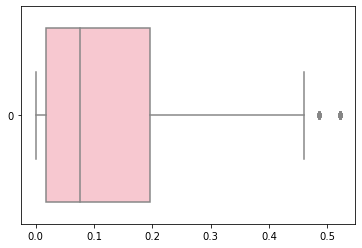

In [211]:
sns.boxplot(data=df['Ecology_1'], orient='h', color='pink');

In [212]:
ecology1_outliers_index, min_border, max_border = outliers_iqr(df['Ecology_1'])

In [213]:
len(ecology1_outliers_index)

61

In [214]:
df.loc[ecology1_outliers_index, 'Ecology_1']

201     0.486246
516     0.521867
704     0.521867
719     0.486246
798     0.521867
          ...   
9368    0.521867
9371    0.521867
9627    0.521867
9958    0.521867
9985    0.521867
Name: Ecology_1, Length: 61, dtype: float64

**Social_1**

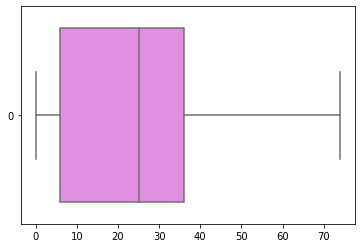

In [215]:
sns.boxplot(data=df['Social_1'], orient='h', color='violet');

**Social_2**

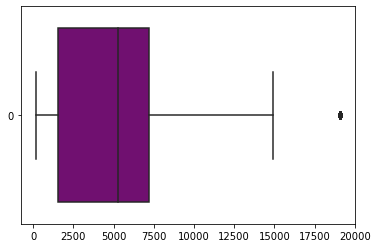

In [216]:
sns.boxplot(data=df['Social_2'], orient='h', color='purple');

In [217]:
social2_outliers_index, min_border, max_border = outliers_iqr(df['Social_2'])
len(social2_outliers_index)

176

In [218]:
df.loc[social2_outliers_index, 'Social_2'] = np.nan

**Social_3**

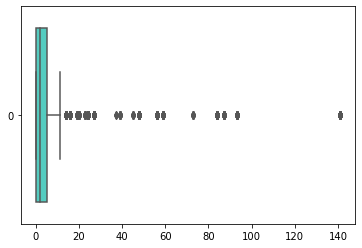

In [219]:
sns.boxplot(data=df['Social_3'], orient='h', color='turquoise');

In [220]:
social3_outliers_index, min_border, max_border = outliers_iqr(df['Social_3'])
len(social3_outliers_index)

862

In [221]:
df.loc[social3_outliers_index, 'Social_3'] = np.nan

In [222]:
df = df.dropna()

In [223]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Kitchen_outlier,HouseFloor_outlier,Floor_outlier,HouseYear_outlier
0,27,3.0,115.027311,99.027311,10.0,4,10.0,2014,0.075424,1,...,0.0,0,0,1,305018.871089,0,0,0,0,0
1,22,1.0,39.832524,25.832524,8.0,7,8.0,1966,0.118537,1,...,1.0,1,0,1,177734.553407,0,0,0,0,0
2,1,3.0,78.342215,62.342215,10.0,2,17.0,1988,0.025609,1,...,0.0,3,1,1,282078.720850,0,0,0,0,0
3,1,1.0,40.409907,33.409907,3.0,10,22.0,1977,0.007122,1,...,0.0,0,1,1,168106.007630,0,1,0,0,0
4,94,2.0,64.285067,49.285067,9.0,16,16.0,1972,0.282798,1,...,2.0,0,6,1,343995.102962,0,0,0,0,0
